In [1]:
import sys, os, h5py, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import pylab as pl

CF_path = '../pysrc'
sys.path.append(CF_path)
import cooling_flow as CF
import HaloPotential as Halo
import WiersmaCooling as Cool

# load vc and Z from simulation

In [2]:
fn1 = 'data.npz'
fn2 = 'data_vc.npz'
f1 = np.load(fn1)
f2 = np.load(fn2)
rvir = 200.*un.kpc
f1.files, f2.files

(['Radius', 'Z_sun', 'T', 'rho'], ['Radius', 'vc'])

# define gravitational potential

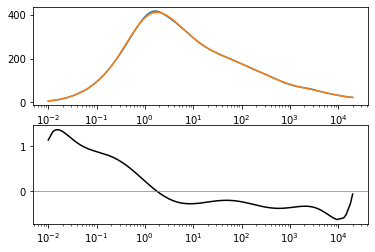

In [3]:
pl.subplot(211)
pl.semilogx(f2['Radius'], f2['vc'])
coeffs = pl.polyfit(log(f2['Radius']/rvir.value), log(f2['vc']),10)[::-1]
potential = Halo.Polynom(coeffs,rvir)
pl.plot(f2['Radius'],potential.vc(f2['Radius']*un.kpc))
pl.subplot(212)
pl.semilogx(f2['Radius'],potential.dlnvc_dlnR(f2['Radius']*un.kpc),c='k')
pl.axhline(0,c='.5',lw=0.7)

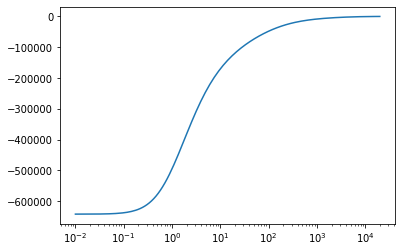

In [4]:
pl.semilogx(f2['Radius'],potential.Phi(f2['Radius']*un.kpc))

# define cooling function

In [5]:
Z = 0.1
z = 0
cooling = Cool.Wiersma_Cooling(Z,z)

../pysrc/WiersmaCooling.py:53: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


# define angular momentum radius and mass inflow rate

In [6]:
Rcirc=8*un.kpc
Mdot = (4*np.pi*(80*un.kpc)**2*50*un.km/un.s*1e-4*un.cm**-3*cons.m_p/0.7).to('Msun/yr')
Mdot = 3*un.Msun/un.yr

# integrate solution

In [7]:
res = CF.shoot_from_R_circ(potential,
                    cooling,
                    R_circ=Rcirc,
                     Mdot=Mdot,R_max=Rcirc*100,
                    pr=True)

Integrated with log T(R_circ)=4.50, maximum radius reached 14 kpc, stop reason: sonic point


../pysrc/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
../pysrc/WiersmaCooling.py:59: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/home/jonathan/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2507: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/home/jonathan/miniconda3/lib/python3.7/site-packa

Integrated with log T(R_circ)=4.75, maximum radius reached 24 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.88, maximum radius reached 44 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.94, maximum radius reached 80 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.97, maximum radius reached 143 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.98, maximum radius reached 257 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.99, maximum radius reached 504 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.00, maximum radius reached 799 kpc, stop reason: max R reached


In [8]:
res.save('1D_steady_state_solution')

In [9]:
f3 = np.load('1D_steady_state_solution.npz')
f3.files

['rs_in_kpc', 'rhos_in_g_to_cm3', 'Ts_in_K', 'vs_in_kms']

/home/jonathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


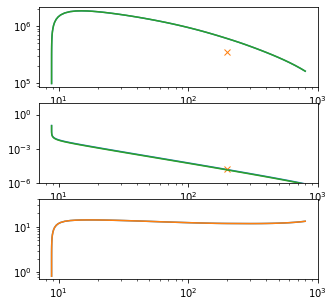

In [10]:
pl.figure(figsize=(5,5))
for iPanel in range(3):
    pl.subplot(3,1,iPanel+1)
    if iPanel==0: 
        pl.loglog(res.Rs(), res.Ts())
        pl.plot([200],f1['T'],'x')
        pl.loglog(f3['rs_in_kpc'],f3['Ts_in_K'])
    if iPanel==1: 
        pl.loglog(res.Rs(), res.nHs())
        pl.ylim(1e-6,1e1)        
        pl.plot([200],0.7*f1['rho']/cons.m_p.to('g'),'x')
        pl.loglog(f3['rs_in_kpc'],0.7*f3['rhos_in_g_to_cm3']/cons.m_p.to('g'))
    if iPanel==2: 
        pl.semilogx(res.Rs(), res.vs())
        pl.loglog(f3['rs_in_kpc'],f3['vs_in_kms'])
        pl.ylim(0,40)
        